### First Steps

- Need to generate apropriate latent space
- To do this, in your config file, change the test data paths of T,Q,W to 
"/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Scaled_Anon_Randomized_Space_Time_T_Test.npy"
"/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Scaled_Anon_Randomized_Space_Time_Q_Test.npy"
"/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Scaled_Randomized_Space_Time_W_Test.npy"
- run "sample script"; generate both 2D and 3D latent spaces (need to manually change saves for each dimension; pca = PCA(n_components=2) argument needs to be adjusted; make sure it is the "sample_latent_space_var" var function that is commented out)

- Need to make ELBO Labels
- in the sample script, comment out "sample_latent_space_var", and comment in "sample_anon_detect"
- chanbge save path to something that makes sense to you
- run the scripts

- repeat above with the single channel vae when it is done

In [3]:
import numpy as np
import socket  
import matplotlib.cm as cm
from matplotlib import ticker
import math
import scipy
from scipy import spatial
import matplotlib.pyplot as plt
import matplotlib
#import mpl_scatter_density
import xarray as xr
import dask
from sklearn.neighbors import KDTree
import netCDF4
from metpy import calc
from metpy.units import units

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from IPython.display import HTML
from matplotlib import animation
from matplotlib.gridspec import GridSpec
from scipy.stats import gaussian_kde
import skimage
import plotly.graph_objects as go

from matplotlib import animation
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.cluster import KMeans

import matplotlib
import matplotlib.colors as colors
import matplotlib.patches as patches
from matplotlib import ticker
import cartopy
import cartopy.feature as cfeature
import cartopy.crs as ccrs
from statistics import mode
from matplotlib import transforms
import netCDF4

import os
# import moviepy.video.io.ImageSequenceClip
# from IPython.display import Video

In [4]:
path = "/DFS-L/DATA/pritchard/gmooers/Raw_Data_Storage/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-20-00000.nc"
extra_variables = xr.open_dataset(path)
ha = extra_variables.hyai.values
hb = extra_variables.hybi.values
PS = 1e5
Pressures_real = PS*ha+PS*hb
print(socket.gethostname())



pritchnode.gp.local


In [5]:
fz = 15*1.5
lw = 4
siz = 100
XNNA = 1.25 # Abscissa where architecture-constrained network will be placed
XTEXT = 0.25 # Text placement
YTEXT = 0.3 # Text placement

plt.rc('text', usetex=False)
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
#mpl.rcParams["font.serif"] = "STIX"
plt.rc('font', family='serif', size=fz)
matplotlib.rcParams['lines.linewidth'] = lw

In [6]:
others = netCDF4.Dataset("/fast/gmooers/Raw_Data/extras/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc")
levs = np.array(others.variables['lev'])
lons = np.array(others.variables['lon'])
new = np.flip(levs)
crms = np.arange(1,129,1)
Xs, Zs = np.meshgrid(crms, new)

In [7]:
path_to_file = '/DFS-L/DATA/pritchard/gmooers/Raw_Data_Storage/MAPS/SPCAM/100_Days/New_SPCAM5/archive/TimestepOutput_Neuralnet_SPCAM_216/atm/hist/TimestepOutput_Neuralnet_SPCAM_216.cam.h1.2009-01-01-00000.nc'
extra_variables = xr.open_dataset(path_to_file)
latitudes = np.squeeze(extra_variables.LAT_20s_to_20n.values)
longitudes = np.squeeze(extra_variables.LON_0e_to_360e.values)
new_lons, new_lats = np.meshgrid(longitudes, latitudes)

## Change paths to your 2D and 3D Latent Spaces

(z_test_tsne_track_31; z_test_tsne_track_31_3D)

In [8]:
z_test_tsne_track_31 = np.load('/fast/hmangipu/MAPS/model_graphs/latent_space/NewData_2D_PCA_Latent_Space__3121600.npy')
z_test_tsne_track_31_3D = np.load('/fast/hmangipu/MAPS/model_graphs/latent_space/NewData_3D_PCA_Latent_Space__3121600.npy')

W_Test_Unscaled = np.load("/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Unscaled_Randomized_Space_Time_W_Test.npy")
T_Test_Unscaled = np.load("/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Unscaled_Anon_Randomized_Space_Time_T_Test.npy")
Q_Test_Unscaled = np.load("/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Unscaled_Anon_Randomized_Space_Time_Q_Test.npy")


lat_test = np.load('/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Randomized_Space_Time_Lat_Test.npy')
lon_test = np.load('/fast/gmooers/Preprocessed_Data/Randomized_Third_Day/Randomized_Space_Time_Lon_Test.npy')

# Change path to your ELBO labels you just made

In [9]:
MultiVAE_ELBO = np.load("/fast/hmangipu/MAPS/model_graphs/Anomalies/Multichanel_ELBO_Data__3121600.npy")
SingleVAE_ELBO = np.load("Compressed_Data/SingleVAE_ELBO_Data__901.npy")

### Quickly Visualize ELBO

(array([1.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.24999e+05]),
 array([-6.69188405e+19, -6.02269564e+19, -5.35350724e+19, -4.68431883e+19,
        -4.01513043e+19, -3.34594202e+19, -2.67675362e+19, -2.00756521e+19,
        -1.33837681e+19, -6.69188405e+18,  2.27810741e+03]),
 <a list of 10 Patch objects>)

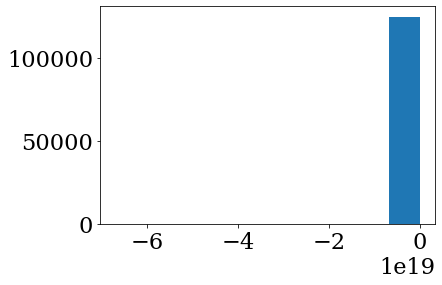

In [10]:
plt.hist(MultiVAE_ELBO)

In [11]:
print(np.percentile(MultiVAE_ELBO, 0.01))
print(np.percentile(MultiVAE_ELBO, 0.1))
print(np.percentile(MultiVAE_ELBO, 1.0))
print(np.percentile(MultiVAE_ELBO, 10.0))
print(np.percentile(MultiVAE_ELBO, 90.0))
print(np.percentile(MultiVAE_ELBO, 99.0))
print(np.percentile(MultiVAE_ELBO, 99.9))
print(np.percentile(MultiVAE_ELBO, 99.99))

-523408539.65233743
-461431.42624334246
-79870.91994000957
-59462.204140896756
-25367.218998516568
-12108.245205529485
-5361.793682748307
-1908.1025907408243


## 2D Latent Space Vizualization

- You need to change the limits (vmin; vmax) base on the plot above

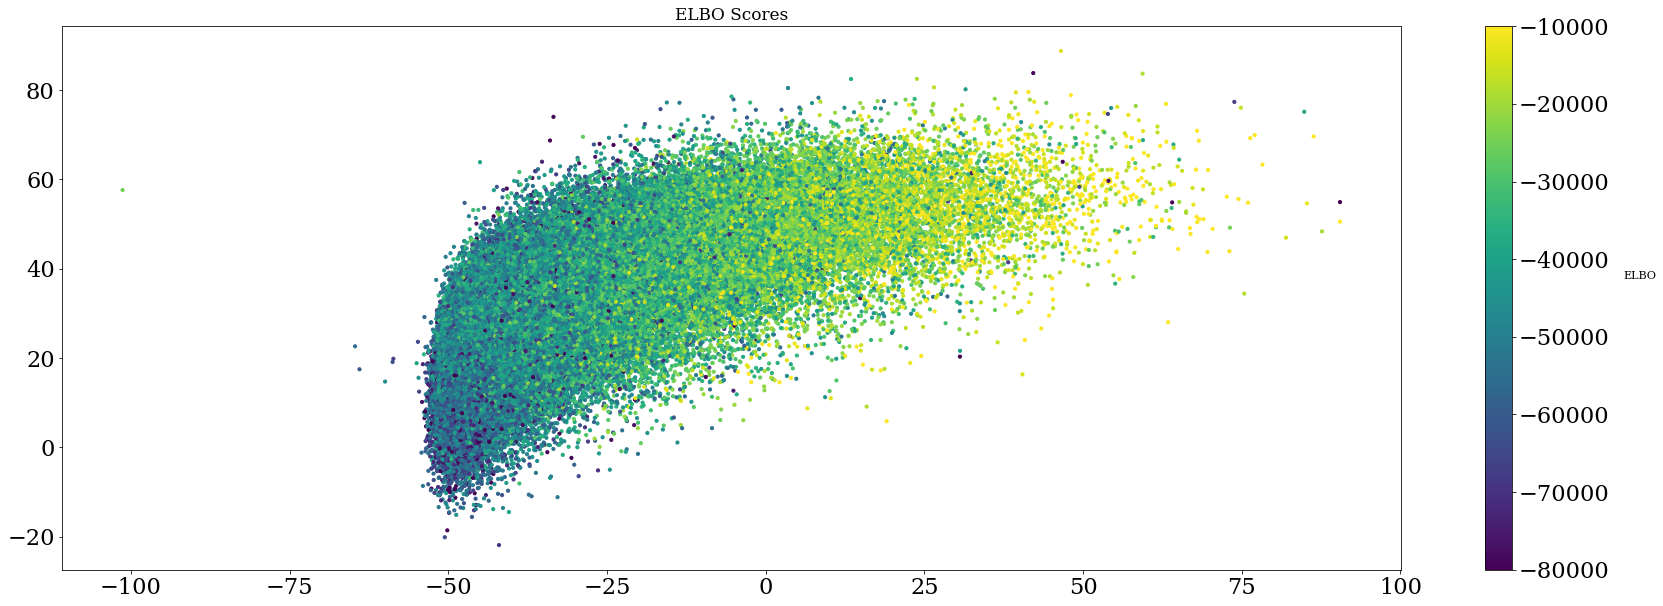

In [12]:
fig, ax = plt.subplots(figsize=(30,10))

cp = ax.scatter(x=z_test_tsne_track_31[:, 0], y=z_test_tsne_track_31[:, 1], c=MultiVAE_ELBO, vmin=-80000, vmax=-10000, s=10.0)
ax.set_title("ELBO Scores", fontsize = fz*0.75)
cbar = fig.colorbar(cp)
cbar.set_label(label="ELBO", rotation="horizontal", fontsize=fz*0.5, labelpad=30, y = 0.55)


## (Optional)

# Redo plot above with your 3D latent space

## Look at top 5% of ELBO Anomalies

In [13]:
MultiVAE_Anomalies = MultiVAE_ELBO[MultiVAE_ELBO >= np.percentile(MultiVAE_ELBO, 95)]
Test_Images_MultiVAE_W = W_Test_Unscaled[MultiVAE_ELBO >= np.percentile(MultiVAE_ELBO, 95)]
Test_Images_MultiVAE_T = T_Test_Unscaled[MultiVAE_ELBO >= np.percentile(MultiVAE_ELBO, 95)]
Test_Images_MultiVAE_Q = Q_Test_Unscaled[MultiVAE_ELBO >= np.percentile(MultiVAE_ELBO, 95)]
lat_test_MultiVAE = lat_test[MultiVAE_ELBO >= np.percentile(MultiVAE_ELBO, 95)]
lon_test_MultiVAE = lon_test[MultiVAE_ELBO >= np.percentile(MultiVAE_ELBO, 95)]
z_test_tsne_track_MultiVAE = z_test_tsne_track_31[MultiVAE_ELBO >= np.percentile(MultiVAE_ELBO, 95)]

SingleVAE_Anomalies = SingleVAE_ELBO[SingleVAE_ELBO >= np.percentile(SingleVAE_ELBO, 95)]
Test_Images_SingleVAE_W = W_Test_Unscaled[SingleVAE_ELBO >= np.percentile(SingleVAE_ELBO, 95)]
Test_Images_SingleVAE_T = T_Test_Unscaled[SingleVAE_ELBO >= np.percentile(SingleVAE_ELBO, 95)]
Test_Images_SingleVAE_Q = Q_Test_Unscaled[SingleVAE_ELBO >= np.percentile(SingleVAE_ELBO, 95)]
lat_test_SingleVAE = lat_test[SingleVAE_ELBO >= np.percentile(SingleVAE_ELBO, 95)]
lon_test_SingleVAE = lon_test[SingleVAE_ELBO >= np.percentile(SingleVAE_ELBO, 95)]
z_test_tsne_track_SingleVAE = z_test_tsne_track_31[SingleVAE_ELBO >= np.percentile(SingleVAE_ELBO, 95)]

In [14]:
lat_keys = np.arange(0,22,1)
lat_values = latitudes
lon_keys = np.arange(0,144,1)
lon_values = longitudes

lat_dic = dict(zip(lat_values, lat_keys))
lon_dic = dict(zip(lon_values, lon_keys))

In [15]:
lat_lon_map_counter_multi = np.zeros(shape=(22,144))
lat_lon_map_counter_single = np.zeros(shape=(22,144))

In [16]:
for i in range(len(MultiVAE_Anomalies)):
    lat_lon_map_counter_multi[lat_dic[lat_test_MultiVAE[i]],lon_dic[lon_test_MultiVAE[i]]] = lat_lon_map_counter_multi[lat_dic[lat_test_MultiVAE[i]],lon_dic[lon_test_MultiVAE[i]]] + 1
    lat_lon_map_counter_single[lat_dic[lat_test_SingleVAE[i]],lon_dic[lon_test_SingleVAE[i]]] = lat_lon_map_counter_single[lat_dic[lat_test_SingleVAE[i]],lon_dic[lon_test_SingleVAE[i]]] + 1

In [17]:
max_val = max([np.max(lat_lon_map_counter_single),np.max(lat_lon_map_counter_multi)])

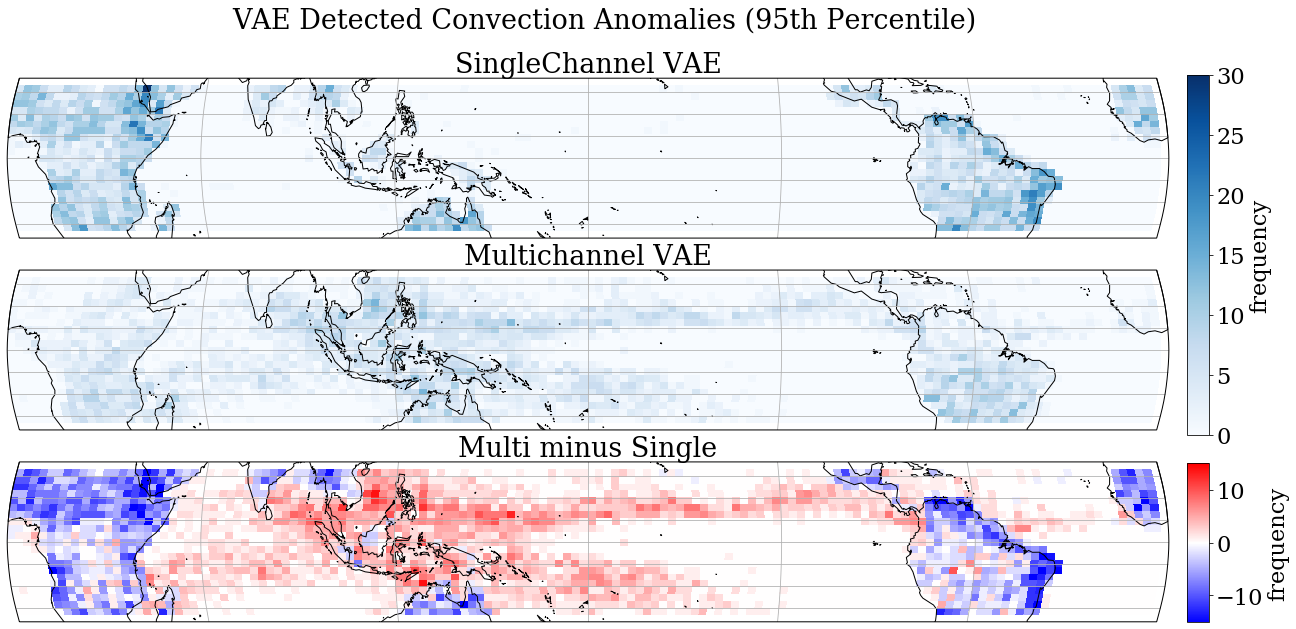

In [18]:
fig, ax = plt.subplots(3,1,figsize=(30,10),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})

contour_plot = ax[0].pcolormesh(new_lons, new_lats, lat_lon_map_counter_single, cmap="Blues", vmin=0, vmax=max_val, transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "ELBO", ax=ax[0])
# ax[0].coastlines(linewidth=0.5,edgecolor='0.25')
ax[0].gridlines()
# ax[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax[0].add_feature(cfeature.GSHHSFeature(edgecolor='k'))
ax[0].set_title("SingleChannel VAE")

contour_plot = ax[1].pcolormesh(new_lons, new_lats, lat_lon_map_counter_multi,cmap="Blues", vmin=0, vmax=max_val, transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "m/s", ax=ax[1])
# ax[1].coastlines(linewidth=0.5,edgecolor='0.25')
ax[1].gridlines()
# ax[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax[1].add_feature(cfeature.GSHHSFeature(edgecolor='k'))
ax[1].set_title("Multichannel VAE")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.74, 0.385, 0.01, 0.50])
cbar = fig.colorbar(contour_plot, label='frequency', cax=cbar_ax)

contour_plot = ax[2].pcolormesh(new_lons, new_lats, lat_lon_map_counter_multi - lat_lon_map_counter_single, cmap="bwr", vmin = -max_val/2, vmax=max_val/2, transform=ccrs.PlateCarree())
# ax[2].coastlines(linewidth=0.5,edgecolor='0.25')
ax[2].gridlines()
# ax[2].add_feature(cfeature.GSHHSBORDERS,linewidth=0.5,edgecolor='0.25')
ax[2].add_feature(cfeature.GSHHSFeature(edgecolor='k'))
ax[2].set_title("Multi minus Single")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.74, 0.125, 0.01, 0.22])
cbar = fig.colorbar(contour_plot, label='frequency', cax=cbar_ax)

plt.suptitle("VAE Detected Convection Anomalies (95th Percentile)", y = 0.98, x=0.47)
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.savefig("Figures/Figure_4.png")
# plt.savefig("Figures/Figure_4.pdf")

# Look at vertical profile differences

In [19]:
ww_test = np.empty(W_Test_Unscaled.shape)
for i in range(len(W_Test_Unscaled)):
    ww_test[i,:,:] = ((W_Test_Unscaled[i,:,:] - np.nanmean(np.squeeze(W_Test_Unscaled[i,:,:]),axis=1)[:,None])**2)**0.5

In [20]:
ww_multi = ww_test[MultiVAE_ELBO >= np.percentile(MultiVAE_ELBO, 95)]
ww_single = ww_test[SingleVAE_ELBO >= np.percentile(SingleVAE_ELBO, 95)]

In [21]:
ww_profiles_multi = np.empty(shape=(len(ww_multi)*len(ww_multi[0][0]), len(ww_multi[0])))
ww_profiles_single = np.empty(shape=(len(ww_single)*len(ww_single[0][0]), len(ww_single[0])))
for i in range(len(ww_multi[0])):
    ww_profiles_multi[:,i] = ww_multi[:,i,:].flatten()
    ww_profiles_single[:,i] = ww_single[:,i,:].flatten()

In [22]:
ww_mean_profile_multi = np.median(ww_profiles_multi, axis = 0)
ww_25th_profile_multi = np.percentile(ww_profiles_multi, 25, axis = 0)
ww_75th_profile_multi = np.percentile(ww_profiles_multi, 75, axis = 0)

ww_mean_profile_single = np.median(ww_profiles_single, axis = 0)
ww_25th_profile_single = np.percentile(ww_profiles_single, 25, axis = 0)
ww_75th_profile_single = np.percentile(ww_profiles_single, 75, axis = 0)

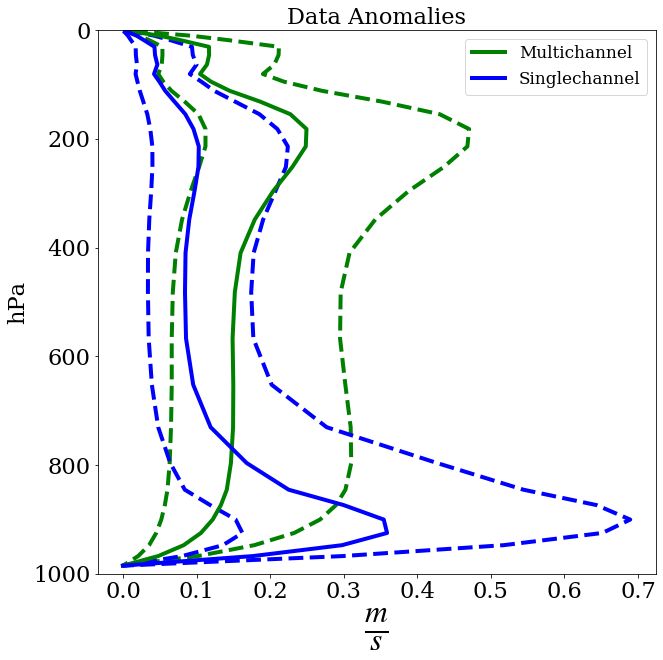

In [23]:
fig, ax = plt.subplots(figsize=(10,10))

ax.plot(np.flipud(ww_25th_profile_multi), Pressures_real[:-1]/100.0, color="green", linestyle="dashed")
ax.plot(np.flipud(ww_75th_profile_multi), Pressures_real[:-1]/100.0, color="green", linestyle="dashed")
ax.plot(np.flipud(ww_25th_profile_single), Pressures_real[:-1]/100.0, color="blue", linestyle="dashed")
ax.plot(np.flipud(ww_75th_profile_single), Pressures_real[:-1]/100.0, color="blue", linestyle="dashed")

ax.plot(np.flipud(ww_mean_profile_multi), Pressures_real[:-1]/100.0, color="green", label="Multichannel")
ax.plot(np.flipud(ww_mean_profile_single), Pressures_real[:-1]/100.0, color="blue", label="Singlechannel")
ax.legend(fontsize=fz*0.75)
ax.set_ylim(0,1000)
ax.set_ylim(ax.get_ylim()[::-1])
ax.set_xlabel(r"$\frac{m}{s}$", fontsize=fz*2.0)
ax.set_ylabel("hPa")
ax.set_title("Data Anomalies", fontsize = fz)
plt.savefig("Figures/DataAnomalies.png")

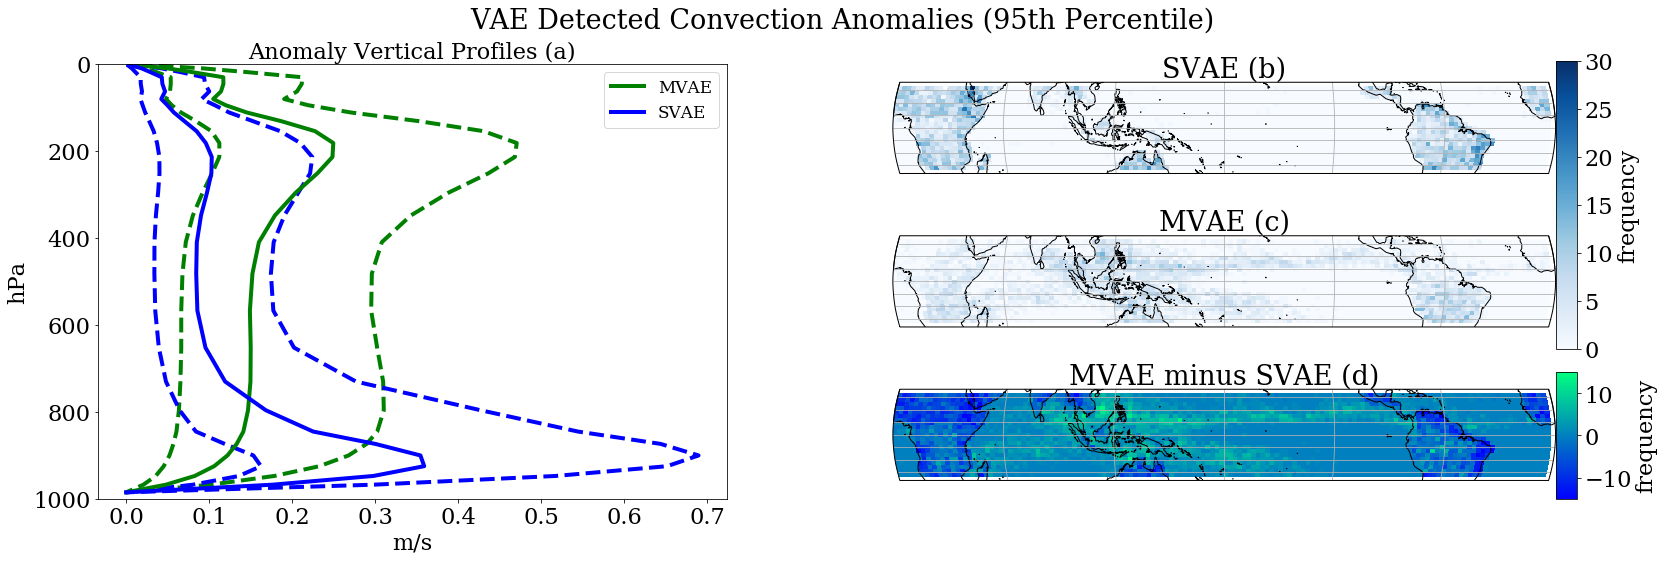

In [28]:
# fig, ax = plt.subplots(3,2,figsize=(30,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
fig, ax = plt.subplots(3,2,figsize=(30,8),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})
#gs=GridSpec(3,2, width_ratios=[1, 4])
gs=GridSpec(3,2, width_ratios=[1.9, 2.1])

ax1=fig.add_subplot(gs[:,0])


ax1.plot(np.flipud(ww_25th_profile_multi), Pressures_real[:-1]/100.0, color="green", linestyle="dashed")
ax1.plot(np.flipud(ww_75th_profile_multi), Pressures_real[:-1]/100.0, color="green", linestyle="dashed")
ax1.plot(np.flipud(ww_25th_profile_single), Pressures_real[:-1]/100.0, color="blue", linestyle="dashed")
ax1.plot(np.flipud(ww_75th_profile_single), Pressures_real[:-1]/100.0, color="blue", linestyle="dashed")

ax1.plot(np.flipud(ww_mean_profile_multi), Pressures_real[:-1]/100.0, color="green", label="MVAE")
ax1.plot(np.flipud(ww_mean_profile_single), Pressures_real[:-1]/100.0, color="blue", label="SVAE")

ax1.legend(fontsize=fz*0.75)
ax1.set_ylim(0,1000)
ax1.set_ylim(ax1.get_ylim()[::-1])
ax1.set_xlabel("m/s")
ax1.set_ylabel("hPa")
ax1.set_title("Anomaly Vertical Profiles (a)", fontsize = fz)


# fig, ax = plt.subplots(3,1,figsize=(30,10),subplot_kw={'projection':ccrs.Robinson(central_longitude=180)})

contour_plot = ax[0,1].pcolormesh(new_lons, new_lats, lat_lon_map_counter_single, cmap="Blues", vmin=0, vmax=max_val, transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "ELBO", ax=ax[0])
# ax[0].coastlines(linewidth=0.5,edgecolor='0.25')
ax[0,1].gridlines()
# ax[0].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax[0,1].add_feature(cfeature.GSHHSFeature(edgecolor='k'))
ax[0,1].set_title("SVAE (b)")

contour_plot = ax[1,1].pcolormesh(new_lons, new_lats, lat_lon_map_counter_multi,cmap="Blues", vmin=0, vmax=max_val, transform=ccrs.PlateCarree())
#plt.colorbar(contour_plot, label = "m/s", ax=ax[1])
# ax[1].coastlines(linewidth=0.5,edgecolor='0.25')
ax[1,1].gridlines()
# ax[1].add_feature(cfeature.BORDERS,linewidth=0.5,edgecolor='0.25')
ax[1,1].add_feature(cfeature.GSHHSFeature(edgecolor='k'))
ax[1,1].set_title("MVAE (c)")

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.80, 0.385, 0.01, 0.50])
cbar = fig.colorbar(contour_plot, label='frequency', cax=cbar_ax)

contour_plot = ax[2,1].pcolormesh(new_lons, new_lats, lat_lon_map_counter_multi - lat_lon_map_counter_single, cmap="winter", vmin = -max_val/2, vmax=max_val/2, transform=ccrs.PlateCarree())
# ax[2].coastlines(linewidth=0.5,edgecolor='0.25')
ax[2,1].gridlines()
# ax[2].add_feature(cfeature.GSHHSBORDERS,linewidth=0.5,edgecolor='0.25')
ax[2,1].add_feature(cfeature.GSHHSFeature(edgecolor='k'))
ax[2,1].set_title("MVAE minus SVAE (d)")
fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.80, 0.125, 0.01, 0.22])
cbar = fig.colorbar(contour_plot, label='frequency', cax=cbar_ax)

plt.suptitle("VAE Detected Convection Anomalies (95th Percentile)", y = 0.98, x=0.47)
plt.subplots_adjust(wspace=0.2, hspace=0.2)

# plt.savefig("Figures/Figure_4.pdf")


fig.delaxes(ax[0,0])
fig.delaxes(ax[1,0])
fig.delaxes(ax[2,0])

plt.savefig("Figures/ElboAndAnomaly.png")
plt.savefig("Figures/ElboAndAnomaly.pdf")
#plt.savefig("Figures/Figure_3.png")
#plt.savefig("Figures/Figure_3.pdf")

## Look at most extreme fields

You may need to adjust the figure parameters (figsize; t,q max,min; label location, ect...)

In [ ]:
def plot_generator_paper(sample_w, sample_t, sample_q, X, Z, tmin, tmax, qmin, qmax, i):
    cmap="RdBu_r"
    fig, ax = plt.subplots(1,3, figsize=(20,6))
    
    cs0 = ax[0].pcolor(X, Z, sample_w, cmap=cmap, vmin=-6.5, vmax=6.5)
    ax[0].set_title("Anomalous Vertical Velocity Field",  fontsize=fz*0.75)
    ax[0].set_ylim(ax[0].get_ylim()[::-1])
    ax[0].xaxis.set_label_coords(0.54,-0.05)
    h = ax[0].set_ylabel("hPa")
    h.set_rotation(0)
    ax[0].yaxis.set_label_coords(-0.10,0.44)
    divider = make_axes_locatable(ax[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs0, cax=cax)

    cs1 = ax[1].pcolor(X, Z, sample_t, cmap=cmap, vmin=tmin, vmax=tmax)
    ax[1].set_title("Anomalous Temperature Field",  fontsize=fz*0.75)
    ax[1].set_ylim(ax[1].get_ylim()[::-1])
    ax[1].set_xlabel('columns',  fontsize=fz*0.5)
    ax[1].set_yticks([])
    
    ax[1].xaxis.set_label_coords(0.54,-0.05)
    
    
    ax[1].yaxis.set_label_coords(-0.10,0.44)
    divider = make_axes_locatable(ax[1])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs1, cax=cax)
    
    cs2 = ax[2].pcolor(X, Z, sample_q, cmap=cmap, vmin=qmin, vmax=qmax)
    ax[2].set_title("Anomalous Vapor Field",  fontsize=fz*0.75)
    ax[2].set_ylim(ax[2].get_ylim()[::-1])
    ax[2].xaxis.set_label_coords(0.54,-0.05)
    ax[2].set_yticks([])
    
    ax[2].yaxis.set_label_coords(-0.10,0.44)
    divider = make_axes_locatable(ax[2])
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(cs2, cax=cax)
    
    plt.savefig('Figures/'+str(i) + '.png')

In [ ]:
unlikely_elbo_multi = MultiVAE_ELBO[:].argsort()[-100:][::-1]
likely_elbo_multi = MultiVAE_ELBO[:].argsort()[:100][::-1]
MultiVAE_Unlikely_Images_W = W_Test_Unscaled[unlikely_elbo_multi,:,:]
MultiVAE_Likely_Images_W = W_Test_Unscaled[likely_elbo_multi,:,:]
MultiVAE_Unlikely_Images_T = T_Test_Unscaled[unlikely_elbo_multi,:,:]
MultiVAE_Likely_Images_T = T_Test_Unscaled[likely_elbo_multi,:,:]
MultiVAE_Unlikely_Images_Q = Q_Test_Unscaled[unlikely_elbo_multi,:,:]
MultiVAE_Likely_Images_Q = Q_Test_Unscaled[likely_elbo_multi,:,:]

unlikely_elbo_single = SingleVAE_ELBO[:].argsort()[-10:][::-1]
likely_elbo_single = SingleVAE_ELBO[:].argsort()[:10][::-1]
SingleVAE_Unlikely_Images_W = W_Test_Unscaled[unlikely_elbo_single,:,:]
SingleVAE_Likely_Images_W = W_Test_Unscaled[likely_elbo_single,:,:]
SingleVAE_Unlikely_Images_T = T_Test_Unscaled[unlikely_elbo_single,:,:]
SingleVAE_Likely_Images_T = T_Test_Unscaled[likely_elbo_single,:,:]
SingleVAE_Unlikely_Images_Q = Q_Test_Unscaled[unlikely_elbo_single,:,:]
SingleVAE_Likely_Images_Q = Q_Test_Unscaled[likely_elbo_single,:,:]

In [ ]:
np.save("/fast/hmangipu/MAPS/Mooers_Logbook/NeurIPS_Scripts/anomaly.npy", unlikely_elbo_multi)

In [ ]:
t_max = np.percentile(T_Test_Unscaled, 90)
t_min = np.percentile(T_Test_Unscaled, 10)
q_max = np.percentile(Q_Test_Unscaled, 90)
q_min = np.percentile(Q_Test_Unscaled, 10)

In [ ]:
for i in range(len(unlikely_elbo_multi)):
    plot_generator_paper(MultiVAE_Unlikely_Images_W[i,:,:], MultiVAE_Unlikely_Images_T[i,:,:], MultiVAE_Unlikely_Images_Q[i,:,:], Xs, Zs, t_min, t_max, q_min, q_max, i)

In [ ]:
for i in range(len(likely_elbo_multi)):
    plot_generator_paper(MultiVAE_Likely_Images_W[i,:,:], MultiVAE_Likely_Images_T[i,:,:], MultiVAE_Likely_Images_Q[i,:,:], Xs, Zs, t_min, t_max, q_min, q_max)

In [ ]:
for i in range(len(unlikely_elbo_single)):
    plot_generator_paper(SingleVAE_Unlikely_Images_W[i,:,:], SingleVAE_Unlikely_Images_T[i,:,:], SingleVAE_Unlikely_Images_Q[i,:,:], Xs, Zs, t_min, t_max, q_min, q_max)

In [ ]:
for i in range(len(likely_elbo_single)):
    plot_generator_paper(SingleVAE_Likely_Images_W[i,:,:], SingleVAE_Likely_Images_T[i,:,:], SingleVAE_Likely_Images_Q[i,:,:], Xs, Zs, t_min, t_max, q_min, q_max)